In [151]:
displacement_mm=5
dist_hz = 5
num_sample_points = 101 #keep this odd

In [152]:
vel_hz=dist_hz*2
cycletime_secs = 1/vel_hz
acceltime_secs = cycletime_secs/2
accel_mmpms2 = 2 * (displacement_mm/2) / (acceltime_secs * acceltime_secs)
accel_mps2 = accel_mmpms2 / 1000
peakvel_mps = accel_mps2 * acceltime_secs
print("Distance Cycle Time = ", 2*cycletime_secs, "s")
print("Velocity Cycle Time = ", cycletime_secs, "s")
print("Acceleration Time = ", acceltime_secs*1000, "ms")
print("Acceleration = ", str(round(accel_mps2, 2)),"m/s2")
print("Peak Velocity = ", str(round(peakvel_mps, 2)),"m/s")
print("Average Velocity = ", str(round(peakvel_mps/2, 2)),"m/s")
accel_dist_m = 0.5 * accel_mps2 * acceltime_secs * acceltime_secs
print("Accel/Decel Distance = ", str(round(accel_dist_m*1000, 2)),"mm")
print("Total Cycle Distance = ", str(round(2*accel_dist_m*1000, 2)),"mm")

Distance Cycle Time =  0.2 s
Velocity Cycle Time =  0.1 s
Acceleration Time =  50.0 ms
Acceleration =  2.0 m/s2
Peak Velocity =  0.1 m/s
Average Velocity =  0.05 m/s
Accel/Decel Distance =  2.5 mm
Total Cycle Distance =  5.0 mm


In [153]:
import math
import numpy as np

time_list_secs = np.linspace(0.0, cycletime_secs, num=num_sample_points)
#print(len(time_list))
#print("Time List (ms) = ", time_list)
#print(math.ceil(num_sample_points/2))
#print(time_list[0:math.ceil(num_sample_points/2)])

vel_list_mps = [t*accel_mps2 for t in time_list_secs[0:math.floor(num_sample_points/2)]]
#print (vel_list_mps)
#print(time_list[math.floor(num_sample_points/2):])
vel_list_mps = vel_list_mps + [peakvel_mps-(t-acceltime_secs)*accel_mps2 for t in time_list_secs[math.floor(num_sample_points/2):]]
#print ("Velocity List (m/s)= ", vel_list_mps)

In [154]:
dist_list_m = [0.5*accel_mps2*t*t for t in time_list_secs[0:math.floor(num_sample_points/2)]]
max_displacement_m = 0.5*accel_mps2*acceltime_secs*acceltime_secs
deceltime_list_secs = [(t-acceltime_secs) for t in time_list_secs[math.floor(num_sample_points/2):]]
dist_list_m = dist_list_m + [max_displacement_m + (peakvel_mps*t-0.5*accel_mps2*t*t) for t in deceltime_list_secs]


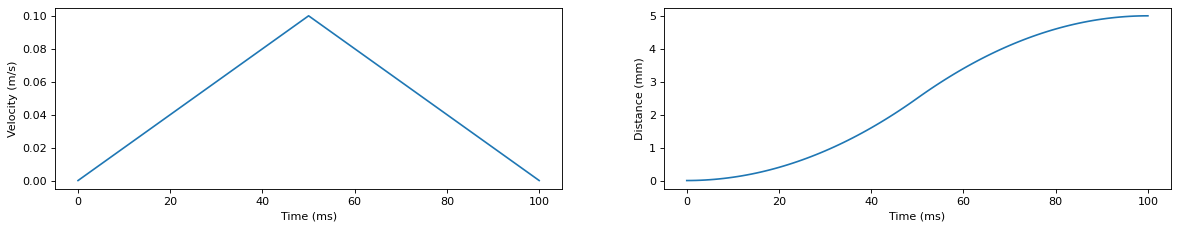

In [155]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(18, 3), dpi= 80, facecolor='w', edgecolor='k')
ax1=plt.subplot(1, 2, 1)
plt.plot(time_list_secs*1000, vel_list_mps) 
plt.xlabel("Time (ms)")
plt.ylabel("Velocity (m/s)")
ax2=plt.subplot(1, 2, 2)
plt.plot(time_list_secs*1000, np.array(dist_list_m) *1000)
plt.xlabel("Time (ms)")
plt.ylabel("Distance (mm)")
plt.show()

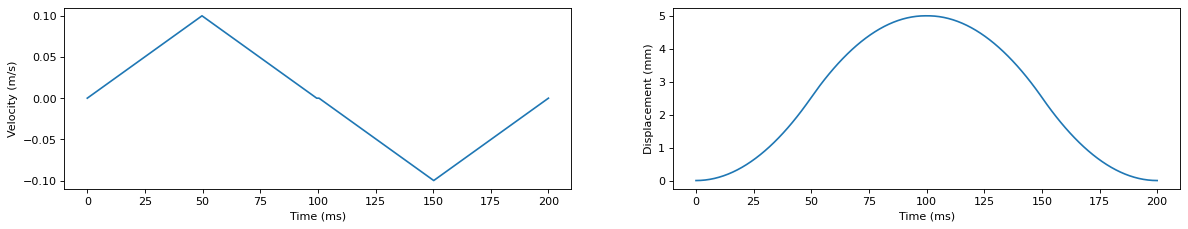

In [156]:
fullcycle_time_list_secs = np.linspace(0.0, 2*cycletime_secs, num=2*num_sample_points)

fig=plt.figure(figsize=(18, 3), dpi= 80, facecolor='w', edgecolor='k')
ax1=plt.subplot(1, 2, 1)
vel_profile_fullcycle = vel_list_mps + [-v for v in vel_list_mps]
plt.plot(fullcycle_time_list_secs*1000, vel_profile_fullcycle) 
plt.xlabel("Time (ms)")
plt.ylabel("Velocity (m/s)")
ax2=plt.subplot(1, 2, 2)
dist_profile_fullcycle = dist_list_m + dist_list_m[::-1]
plt.plot(fullcycle_time_list_secs*1000, np.array(dist_profile_fullcycle) *1000)
plt.xlabel("Time (ms)")
plt.ylabel("Displacement (mm)")
plt.show()

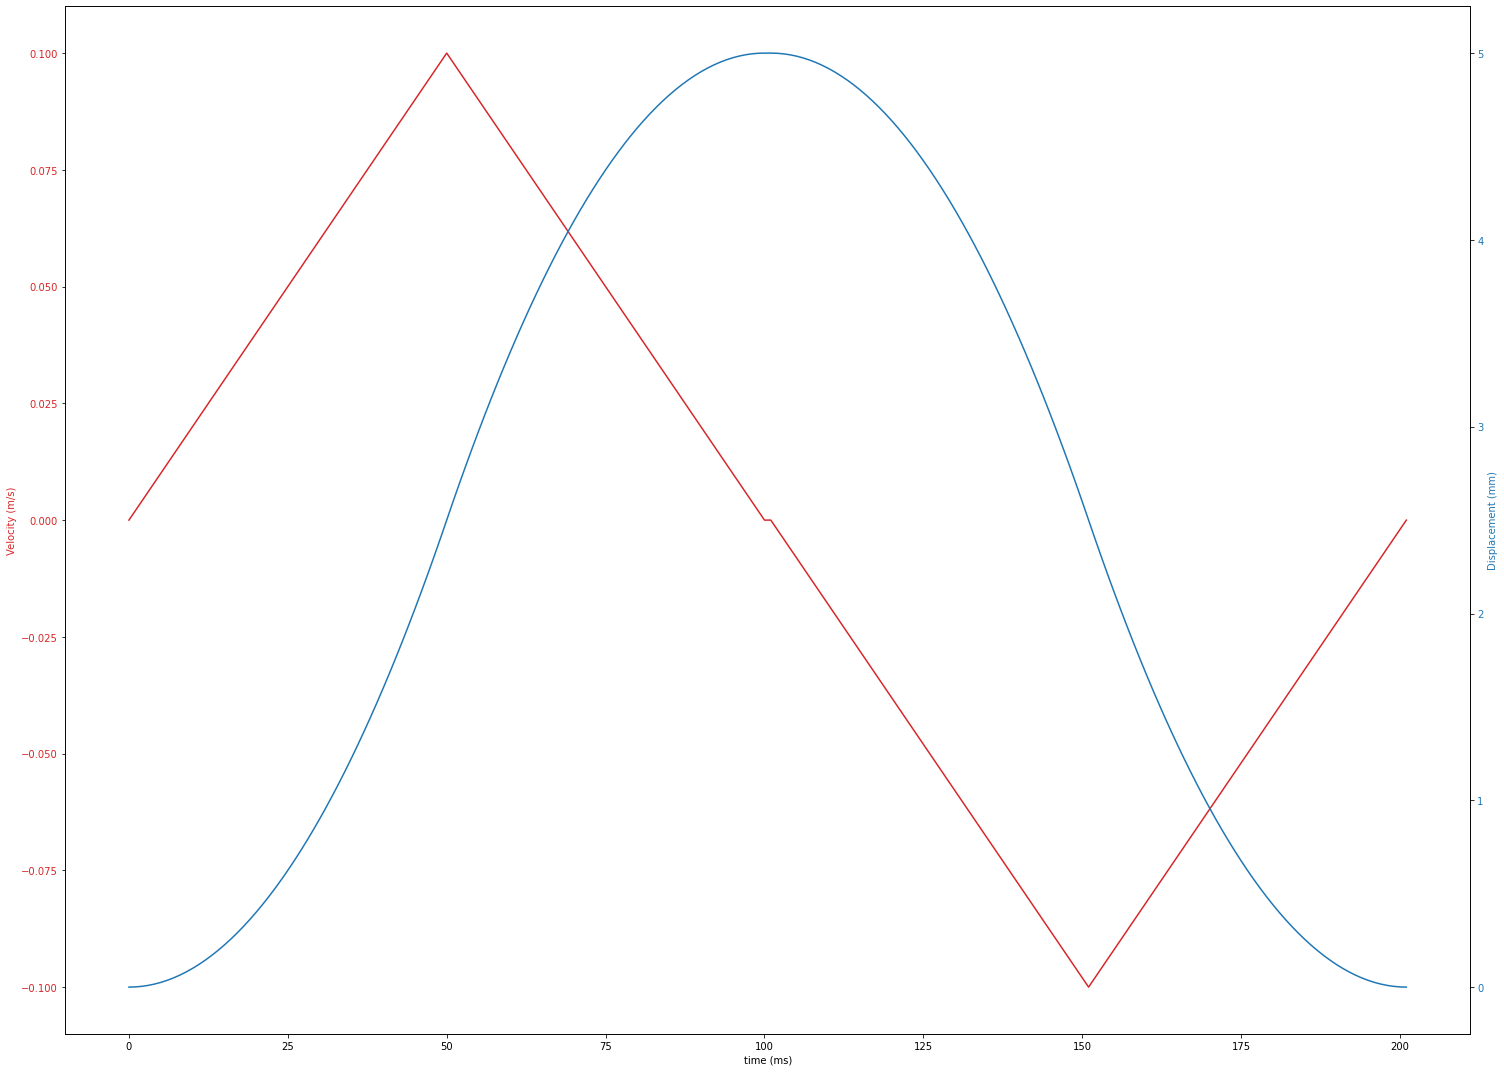

In [160]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [21, 15]
fig,ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('time (ms)')
ax1.set_ylabel('Velocity (m/s)', color=color)
ax1.plot(vel_profile_fullcycle, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Displacement (mm)', color=color)  # we already handled the x-label with ax1
ax2.plot(np.array(dist_profile_fullcycle) *1000, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()